<a href="https://colab.research.google.com/github/brenthueth/colab/blob/main/afbd-census-cbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from downcast import reduce  #pip install downcast

Create a function to enable us to download the Excel file directly from the census website

In [ ]:
def download_file(url):
    local_filename = url.split('/')[-1]
    
    with requests.get(url) as r:
            with open(local_filename, 'wb') as f:  #wb = write binary
                f.write(r.content)
                
    return local_filename

Create the two lists of years necessary for populating the list of urls, then use those to create the list of urls.

In [ ]:
#choose the start and end years of the desired data (between 1986 and 2019)
start_year = 1986
end_year = 2019

yr_full = [i for i in range(start_year, end_year)] #create the list of years of data (i.e., '1986', '1987', ..., '2018')
yr_part = []
for i in yr_full: #create the list of partial years of data (i.e., '86', '87', ..., '18')
    s = str(i)
    x = str(s[-2]+s[-1])
    yr_part.append(x)

urls = []
for i, x in enumerate(yr_full):  #create list of full urls
    st_txt_url = 'https://www2.census.gov/programs-surveys/cbp/datasets/{}/cbp{}st.zip'.format(yr_full[i],yr_part[i])
    urls.append(st_txt_url)
# urls

Download all of the desired data from the census website and create datasets

In [ ]:
d = {}
for i in range(len(yr_part)):
    d["x{0}".format(yr_part[i])] = urls[i]

for k, v in d.items():
    d[k] = download_file(v)
    d[k] = pd.read_csv(v)
    d[k] = reduce(d[k]) #make the file sizes smaller

Add a column, 'year' and populate the dataframes with their respective years

In [ ]:
for k,v in d.items():
    vars()[k] = v

for k,i in zip(d, range(len(yr_full))):
    d[k].columns = d[k].columns.str.lower() #make sure all column names are lowercase
    d[k]['year'] = yr_full[i]

Add all the years into one dataset

In [ ]:
cbp_st = pd.concat(d, ignore_index=True)
cbp_st = cbp_st[['fipstate', 'emp', 'est', 'sic', 'naics', 'lfo', 'year']]

In [ ]:
cbp_IA = cbp_st[cbp_st['fipstate']==19]

# pd.set_option('display.max_rows', None) #prevents truncation of dataframe printout
# cbp_IA

Make new dataset that only grabs the totals (note fipstate==19 is IOWA)

In [ ]:
# cbpIA1 = cbp_IA[cbp_IA['sic'] == '----']
# cbpIA2 = cbp_IA[(cbp_IA['naics'] == '------') & (cbp_IA['year'].isin(['1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008']))]
# cbpIA3 = cbp_IA[(cbp_IA['naics'] == '------') & (cbp_IA['lfo'] == '-')]
cbpIA = cbp_IA[(cbp_IA['naics'] == '------') & (cbp_IA['lfo'] == '-') & (cbp_IA['year'].isin(['2010','2011','2012','2013','2014','2015','2016','2017','2018']))]

In [ ]:
# cbpIA = pd.concat([cbpIA1, cbpIA2, cbpIA3])

In [ ]:
cbpIA

,fipstate,emp,est,naics,lfo,year
132660,19,1253095,80801,------,-,2010
588611,19,1263665,80113,------,-,2011
1040864,19,1293694,80649,------,-,2012
1486387,19,1305216,80581,------,-,2013
1932697,19,1316447,80466,------,-,2014
2380790,19,1338418,80952,------,-,2015
2829367,19,1354487,81563,------,-,2016
3249197,19,1353681,82685,------,-,2017
3597308,19,1364250,82894,------,-,2018


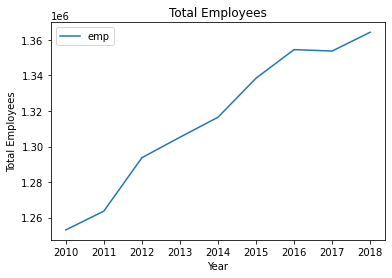

In [ ]:
cbpIA.plot('year', 'emp') 
plt.title('Total Employees')
plt.xlabel('Year')
plt.ylabel('Total Employees')
plt.show()

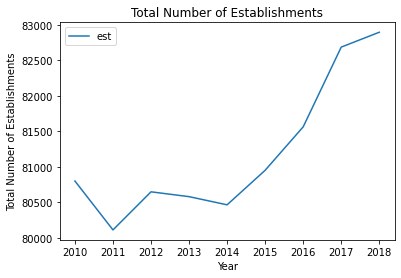

In [ ]:
cbpIA.plot('year', 'est') 
plt.title('Total Number of Establishments')
plt.xlabel('Year')
plt.ylabel('Total Number of Establishments')
plt.show()